In [6]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline


In [7]:
import warnings

warnings.filterwarnings('ignore')

In [88]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,
                        columns = iris.feature_names)
iris_df['spieces'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spieces
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


На данном этапе представим spieces как числовой признак, для рассмотрения в дальнейшем корреляции среди других признаков. Далее переведем в категорийный.

In [89]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   spieces            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [90]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
spieces              0
dtype: int64

In [91]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spieces
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


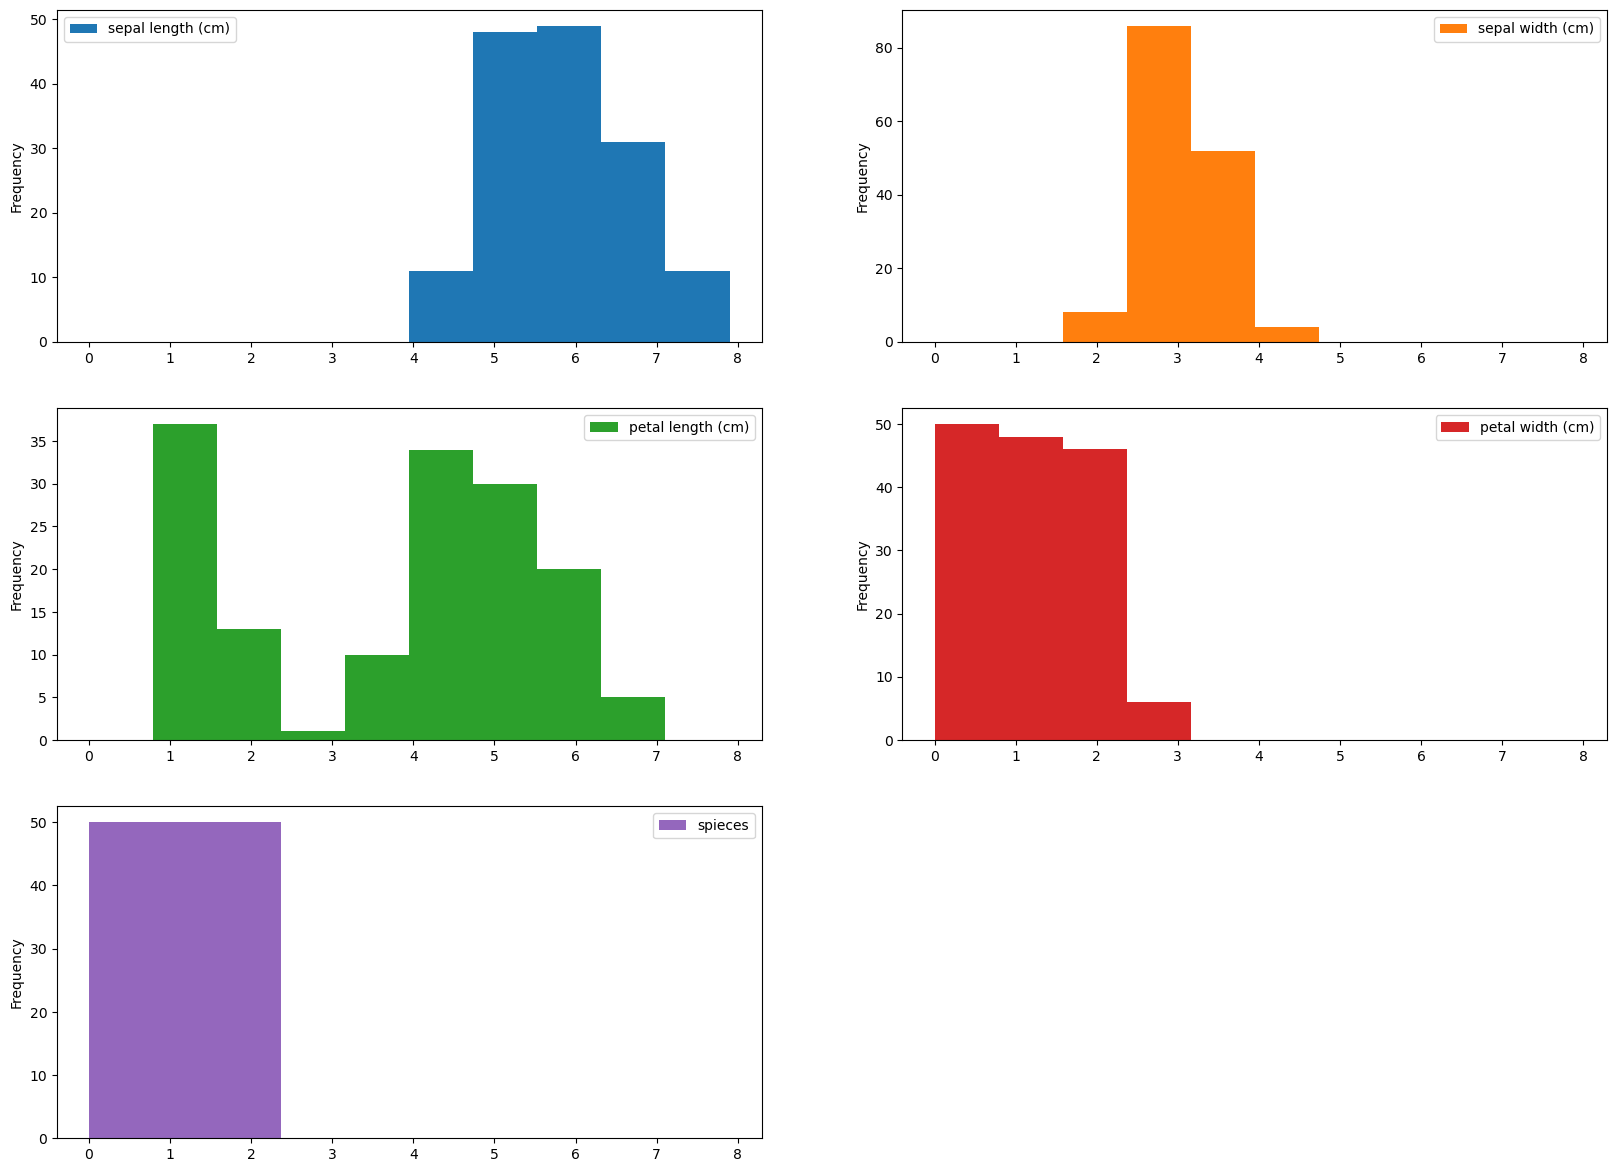

In [92]:
plt.rcParams['figure.figsize']=(20,25)

iris_df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [95]:
iris_corr = iris_df[:-1].corr()


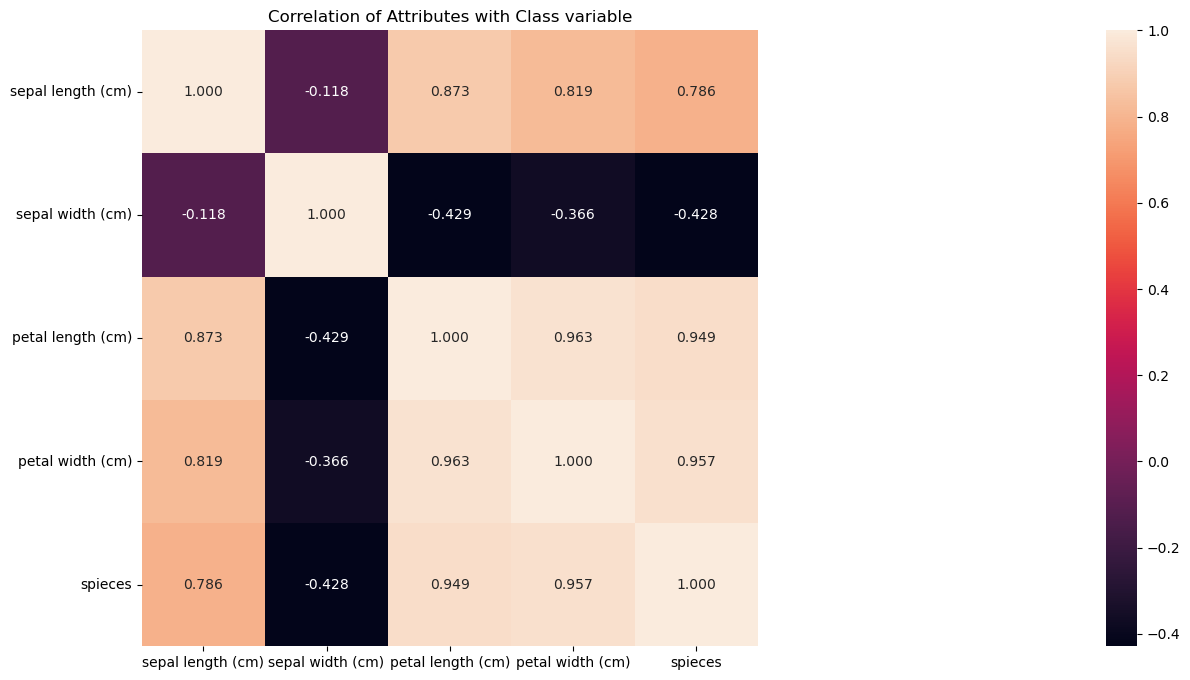

In [96]:
plt.figure(figsize=(90,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(iris_corr, square=True, annot=True, fmt='.3f', linecolor='white')
a.set_xticklabels(a.get_xticklabels())
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()

Корреляция среди spieces и petal length - 0.949, petal width - 0.957 и sepal length - 0.786.

По данной тепловой карте видно, корреляция у petal length и petal width - 0.963, далее сильная зависимость среди sepal length и petal length - 0.872 и petal width - 0.818.


А также наблюдается значительная отрицательная корреляция у sepal width и petal length - (-0.428) и petal width - (-0.366).


Относительно прочих корреляция у sepal length и sepal width стремится к нулю - (-0.118).

#### Теперь подготовим наш сет для обучения. 
Переведем spieces в категорийный признак, и для него будем учиться находить количество ближайших сосейдей. 
Так как мы знаем, что нулевых значений нет, то процесс нам явно упрощен.

In [183]:
iris_df['spieces'] = iris.target_names[iris_df.spieces]
iris_df['spieces']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: spieces, Length: 150, dtype: object

In [127]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']]
y = iris_df['spieces']


In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [129]:
X_train, X_test.shape

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 85                 6.0               3.4                4.5               1.6
 30                 4.8               3.1                1.6               0.2
 101                5.8               2.7                5.1               1.9
 94                 5.6               2.7                4.2               1.3
 64                 5.6               2.9                3.6               1.3
 ..                 ...               ...                ...               ...
 9                  4.9               3.1                1.5               0.1
 103                6.3               2.9                5.6               1.8
 67                 5.8               2.7                4.1               1.0
 117                7.7               3.8                6.7               2.2
 47                 4.6               3.2                1.4               0.2
 
 [90 rows x 4 columns],
 (60, 4))

In [130]:
cols = X_train.columns

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [132]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [133]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [134]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.182068,0.711039,0.456641,0.557995
1,-1.174022,0.005228,-1.103349,-1.195307
2,-0.043947,-0.935853,0.779397,0.933703
3,-0.269962,-0.935853,0.295262,0.182288
4,-0.269962,-0.465312,-0.027494,0.182288


## Начинаем обучение с KNN=3

In [135]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

### Рассмотрим predict и predict_proba на тесте

In [167]:
y_pred = knn.predict(X_test)

y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica'], dtype=object)

In [166]:
knn.predict_proba(X_test)[:,0]

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [149]:
knn.predict_proba(X_test)[:,1]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.66666667, 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.33333333, 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.33333333, 0.        , 1.        , 0.33333333,
       1.        , 0.        , 0.66666667, 1.        , 0.        ,
       0.66666667, 0.66666667, 0.33333333, 1.        , 0.33333333])

In [148]:
knn.predict_proba(X_test)[:,2]

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.66666667, 1.        , 0.        , 0.66666667,
       0.        , 1.        , 0.33333333, 0.        , 1.        ,
       0.33333333, 0.33333333, 0.66666667, 0.        , 0.66666667])

### Проверим accuracy на 3х соседях 

In [168]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.6f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.933333


In [169]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9778


In [158]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9778
Test set score: 0.9333


*Очевидно, что на тренировочной модели метрика выше - 0.9778, на тестовой - 0.93. Это неплохой результат, особенно если учесть, что мы 40% отдали в тестировочный датасет.*

Проверим и сравним с нулевой метрикой:

In [159]:
y_test.value_counts()

versicolor    23
virginica     21
setosa        16
Name: spieces, dtype: int64

In [160]:
null_accuracy = (23/(23+21+16))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.3833


Так как показатель точности модели равен 0.93, а нулевая точность 0.38, то можно смело утверждать, что модель справляется с поставленной задачей. Но интереса ради попробуем увеличить число соседей.

# KNN=5

In [170]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.6f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.933333


Видно, что точность сохранилась, но продолжим изучение дальше.

# KNN=6

In [171]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9167


Точность упала, но мы не расстраиваемся и ищем дальше.

# KNN=7

In [172]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.6f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.933333


Что ж, видимо это предел нашей точности. 

# Вывод
При начальном количестве соседей, то  есть при knn = 3 точность составила - 0.933, то же значение мы видим knn = 5,7,8. Только при k = 6 замечается падение показателя.  
